In [1]:
#Loading the required libraries

import pandas as pd
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

In [2]:
#Loading the data
data = pd.read_csv("Customer-Churn-Records (1).csv")

In [3]:
data.shape

(10000, 18)

In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [5]:
# Display data type of each feature
data.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [6]:
#Shows a quick statistic summary of your data using describe

data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


In [7]:
#Shows a quick statistic summary of your data using describe

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [8]:
data.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [9]:
# Handling Missing Data

#Missing value analysis and dropping the records with missing values

#identify total no. of null values for each column
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
target_variable=data['Exited']
unq=data[['RowNumber','CustomerId']]
target_variable


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# from Eda we found out that surname and RowNumber columns are so important and have unique values. so we can drop them too

In [11]:
data.drop(['RowNumber','CustomerId'], axis=1, inplace=True)

In [12]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [13]:
data_cat=data.select_dtypes(include=['object'])
data_numerical=data.select_dtypes(exclude=['object'])
for i in data_numerical.columns:
          if data_numerical[i].nunique()<15:
            data_cat[i]= data_numerical[i]
            data_numerical=data_numerical.drop(i,axis=1)
data_cat

,Surname,Geography,Gender,Card Type,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,Satisfaction Score
0,Hargrave,France,Female,DIAMOND,2,1,1,1,1,1,2
1,Hill,Spain,Female,DIAMOND,1,1,0,1,0,1,3
2,Onio,France,Female,DIAMOND,8,3,1,0,1,1,3
3,Boni,France,Female,GOLD,1,2,0,0,0,0,5
4,Mitchell,Spain,Female,GOLD,2,1,1,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,France,Male,DIAMOND,5,2,1,0,0,0,1
9996,Johnstone,France,Male,PLATINUM,10,1,1,1,0,0,5
9997,Liu,France,Female,SILVER,7,1,0,1,1,1,3
9998,Sabbatini,Germany,Male,GOLD,3,2,1,0,1,1,2


In [14]:
data_cat.columns

Index(['Surname', 'Geography', 'Gender', 'Card Type', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain',
       'Satisfaction Score'],
      dtype='object')

In [15]:
encoder=LabelEncoder()
data['Surname']=encoder.fit_transform(data['Surname'])
col=data_cat.columns.drop(['Surname','Exited'])
data=data.drop(['Exited'],axis=1)


In [16]:
x=data.columns.drop(col)
dataset=pd.DataFrame()
dataset[x]=data[x]


In [17]:
for i in data[col]:
    j=pd.get_dummies(data=data[i],drop_first=True,prefix='cata{}'.format(i),prefix_sep='_')
    dataset=pd.concat([dataset,j],axis=1)

In [18]:
dataset.head()

,Surname,CreditScore,Age,Balance,EstimatedSalary,Point Earned,cataGeography_Germany,cataGeography_Spain,cataGender_Male,cataCard Type_GOLD,...,cataNumOfProducts_2,cataNumOfProducts_3,cataNumOfProducts_4,cataHasCrCard_1,cataIsActiveMember_1,cataComplain_1,cataSatisfaction Score_2,cataSatisfaction Score_3,cataSatisfaction Score_4,cataSatisfaction Score_5
0,1115,619,42,0.00,101348.88,464,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0
1,1177,608,41,83807.86,112542.58,456,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0
2,2040,502,42,159660.80,113931.57,377,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,289,699,39,0.00,93826.63,350,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,1822,850,43,125510.82,79084.10,425,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1


In [19]:
dataset.shape

(10000, 32)

In [20]:
#Split the data in to train and test

X_train, X_test, y_train, y_test = train_test_split(dataset, target_variable, test_size=0.30,random_state=123)

In [21]:
X_train.shape

(7000, 32)

In [22]:
X_train.columns

Index(['Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary',
       'Point Earned', 'cataGeography_Germany', 'cataGeography_Spain',
       'cataGender_Male', 'cataCard Type_GOLD', 'cataCard Type_PLATINUM',
       'cataCard Type_SILVER', 'cataTenure_1', 'cataTenure_2', 'cataTenure_3',
       'cataTenure_4', 'cataTenure_5', 'cataTenure_6', 'cataTenure_7',
       'cataTenure_8', 'cataTenure_9', 'cataTenure_10', 'cataNumOfProducts_2',
       'cataNumOfProducts_3', 'cataNumOfProducts_4', 'cataHasCrCard_1',
       'cataIsActiveMember_1', 'cataComplain_1', 'cataSatisfaction Score_2',
       'cataSatisfaction Score_3', 'cataSatisfaction Score_4',
       'cataSatisfaction Score_5'],
      dtype='object')

In [23]:
#recursive feature elimination technique
from sklearn.feature_selection import RFE

DT=tree.DecisionTreeClassifier(random_state=42)

rfe_DT=RFE(DT,n_features_to_select=9,verbose=21)

rfe_DT.fit(X_train,y_train)

names=X_train.columns.tolist()

b=rfe_DT.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

#a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

RFE_selected

Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


0                    Age
1                Balance
2        EstimatedSalary
3           Point Earned
4                Surname
5         cataComplain_1
6    cataNumOfProducts_2
7           cataTenure_6
8           cataTenure_9
Name: features, dtype: object

In [24]:
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]

In [25]:
X_test.shape,X_train.shape

((3000, 9), (7000, 9))

In [26]:
#Building a Basic Decision Tree Model

#default decision tree algorithm
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [28]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
#Getting evaluation metrics and evaluating model performance

confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)

#True values vs Model predicted

[[5568    0]
 [   0 1432]]


In [31]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[2391    3]
 [   5  601]]


In [32]:
#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0


In [33]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9987468671679198
Test TPR:  0.9917491749174917
Test Accuracy:  0.9973333333333333


In [34]:
clf.feature_importances_

array([7.80240939e-04, 2.38963619e-03, 1.53233585e-03, 4.12798109e-03,
       5.18614000e-04, 9.89515812e-01, 1.11138238e-04, 3.59149796e-04,
       6.65092215e-04])

In [35]:
data.shape

(10000, 15)

In [36]:
importances = clf.feature_importances_

In [37]:
importances.shape

(9,)

In [38]:
clf.feature_importances_

array([7.80240939e-04, 2.38963619e-03, 1.53233585e-03, 4.12798109e-03,
       5.18614000e-04, 9.89515812e-01, 1.11138238e-04, 3.59149796e-04,
       6.65092215e-04])

In [39]:
df_imp=pd.DataFrame({'features':X_train.columns,'importances':clf.feature_importances_})

df_imp=df_imp.sort_values(by='importances',ascending=False)

df_imp

,features,importances
5,cataComplain_1,0.989516
3,Point Earned,0.004128
1,Balance,0.002390
2,EstimatedSalary,0.001532
0,Age,0.000780
8,cataTenure_9,0.000665
4,Surname,0.000519
7,cataTenure_6,0.000359
6,cataNumOfProducts_2,0.000111


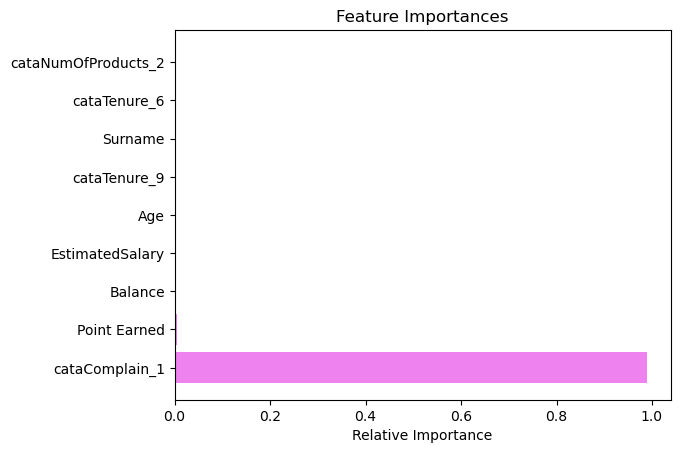

In [40]:
#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['importances'], color='violet')
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()

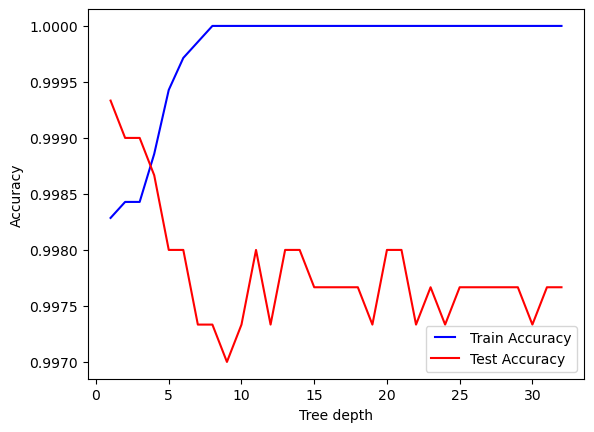

In [41]:
#How do we arrive at the best tree depth for this data?
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

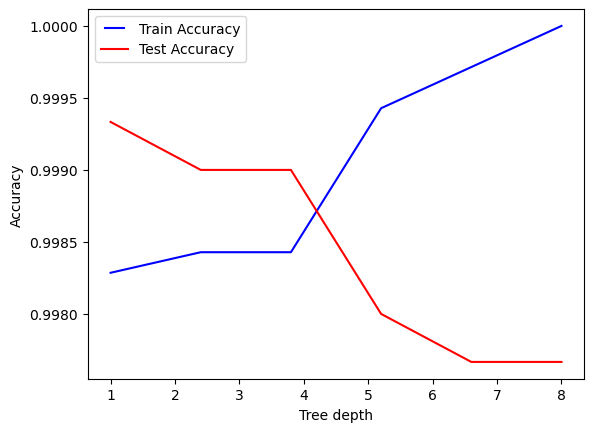

In [42]:
max_depths = np.linspace(1,8 , 6, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

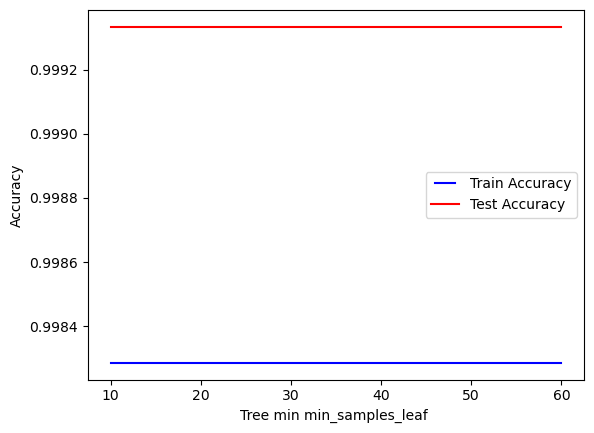

In [43]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

min_samples_leafs=[10,15,20,25,30,35,40,45,50,55,60]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min min_samples_leaf ')
plt.show()

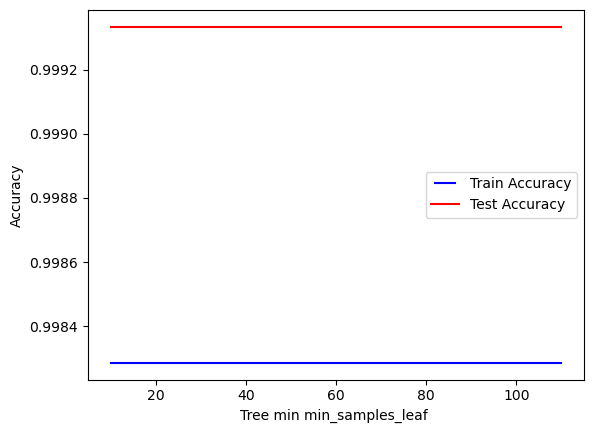

In [44]:

min_samples_leafs=[10,30,50,70,90,110]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min min_samples_leaf ')
plt.show()

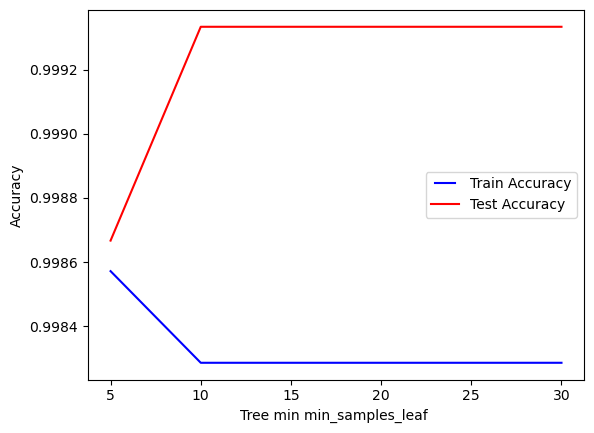

In [45]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

min_samples_leafs=[5,10,15,20,25,30]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min min_samples_leaf ')
plt.show()

## min sample split 

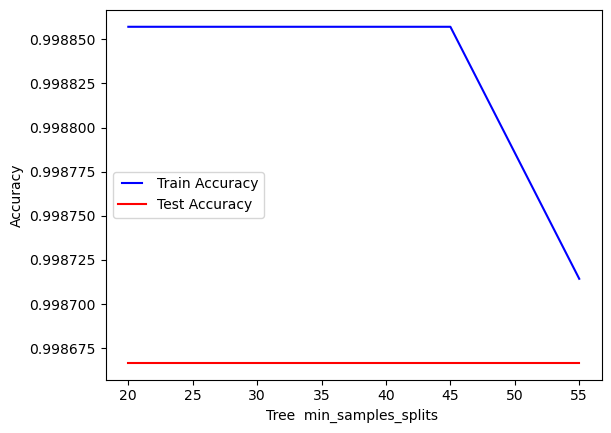

In [46]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

min_samples_splits=[20,25,30,35,45,55]

train_results = []
test_results = []

for i in min_samples_splits:
    dt = tree.DecisionTreeClassifier(min_samples_split=i)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_splits, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree  min_samples_splits ')
plt.show()

## max_leaf_nodes 

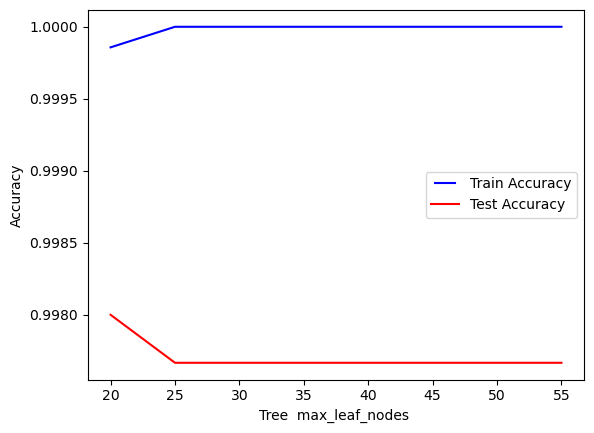

In [47]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

max_leaf_node=[20,25,30,35,45,55]

train_results = []
test_results = []

for i in max_leaf_node:
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_leaf_node, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_leaf_node, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree  max_leaf_nodes ')
plt.show()

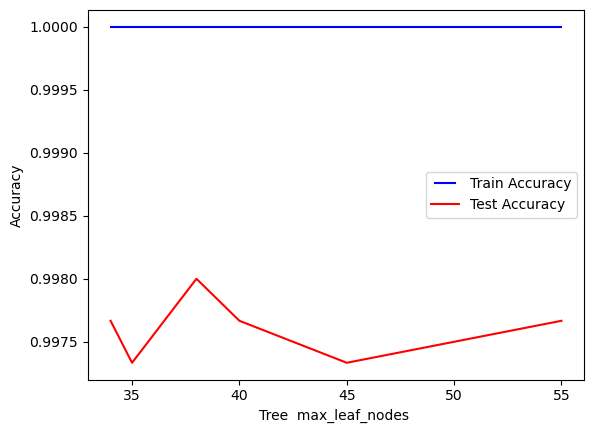

In [48]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

max_leaf_node=[34,35,38,40,45,55]

train_results = []
test_results = []

for i in max_leaf_node:
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_leaf_node, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_leaf_node, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree  max_leaf_nodes ')
plt.show()

In [49]:
#set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 1,2,3,4,5,6,7,8],
              "min_samples_leaf": [5, 10,15,20],
              "max_leaf_nodes": [None, 50, 60, 70],
              }

In [50]:
param_grid_without = {"criterion": ["gini", "entropy"],
              "max_depth": [None, 1,2,3,4,5,6,7,8],
              "min_samples_leaf": [15,20,30,35,40],
              "max_leaf_nodes": [None, 35,36,37,38, 40, 45],
              }

In [51]:
param_grid_with = {"criterion": ["gini", "entropy"],
              "max_depth": [None, 1,2,3,4,4.5,5,6,7,8],
              "min_samples_leaf": [1,2,2,4,15]
              }

In [52]:
#Use the GridSearchCV
dt = tree.DecisionTreeClassifier() #estimator
clf2 = GridSearchCV(dt, param_grid_without, cv=3)
clf2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [None, 35, 36, 37, 38, 40, 45],
                         'min_samples_leaf': [15, 20, 30, 35, 40]})

In [53]:
clf2.best_estimator_

DecisionTreeClassifier(min_samples_leaf=15)

In [54]:
clf2.cv_results_

{'mean_fit_time': array([0.0213116 , 0.02621961, 0.03159451, 0.024767  , 0.02609984,
        0.0314339 , 0.02678752, 0.02354177, 0.02067145, 0.02640247,
        0.03152506, 0.02621086, 0.02117936, 0.02115989, 0.02098624,
        0.02133497, 0.03252236, 0.03324811, 0.0364519 , 0.02621984,
        0.02198648, 0.02339355, 0.01567459, 0.03152251, 0.02462117,
        0.02643188, 0.01676361, 0.01610724, 0.02517716, 0.02927152,
        0.02568142, 0.03285495, 0.02620085, 0.02121544, 0.02304482,
        0.01563533, 0.0158875 , 0.00593289, 0.01514633, 0.01041794,
        0.01449267, 0.01554545, 0.01559552, 0.00949709, 0.01550174,
        0.01349608, 0.01244688, 0.0156436 , 0.01176238, 0.01567229,
        0.0137914 , 0.01041762, 0.01580334, 0.01562786, 0.00824944,
        0.01384409, 0.0156769 , 0.01339841, 0.01562826, 0.01308552,
        0.01045672, 0.01566378, 0.01194151, 0.01567014, 0.01546772,
        0.01567276, 0.01565997, 0.01696539, 0.01584593, 0.01541154,
        0.02085431, 0.01575637,

In [55]:
#Predicting on Train and Test
train_pred = clf2.predict(X_train)
test_pred = clf2.predict(X_test)

In [56]:
#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Train TNR:  0.9983836206896551
Train TPR:  0.9979050279329609
Train Accuracy:  0.9982857142857143
Test TNR:  0.9995822890559732
Test TPR:  0.9983498349834984
Test Accuracy:  0.9993333333333333


In [57]:
clf2.best_estimator_

DecisionTreeClassifier(min_samples_leaf=15)

In [58]:
clf2.best_estimator_.feature_importances_

array([4.61680299e-04, 7.37121858e-05, 5.49783655e-05, 1.05491843e-03,
       5.88805725e-05, 9.98183718e-01, 1.12111780e-04, 0.00000000e+00,
       0.00000000e+00])

In [59]:
df_imp=pd.DataFrame({'features':X_train.columns,'importances':clf2.best_estimator_.feature_importances_})

df_imp=df_imp.sort_values(by='importances',ascending=False)

df_imp

,features,importances
5,cataComplain_1,0.998184
3,Point Earned,0.001055
0,Age,0.000462
6,cataNumOfProducts_2,0.000112
1,Balance,0.000074
4,Surname,0.000059
2,EstimatedSalary,0.000055
7,cataTenure_6,0.000000
8,cataTenure_9,0.000000


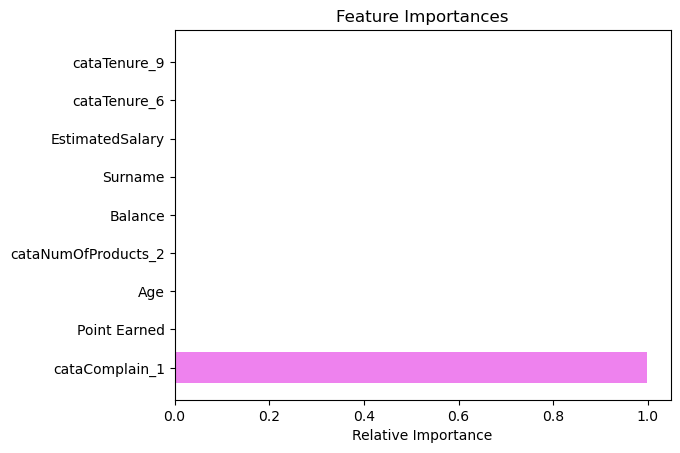

In [60]:
#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['importances'], color='violet')
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()

In [61]:
def get_predictions(X_train,y_train):
    y_train_pred_final = pd.DataFrame({'Exited':y_train.values, 'Exited_Prob':clf2.predict_proba(X_train)[:,1]})
    y_train_pred_final['Cust_ID'] = y_train.index
    y_train_pred_final = y_train_pred_final.reindex(['Cust_ID','Exited','Exited_Prob'], axis=1)
    y_train_pred_final['predicted'] = y_train_pred_final.Exited_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final
    
y_train_pred_final=get_predictions(X_train,y_train)    
# Let's see the head
y_train_pred_final.head()   

,Cust_ID,Exited,Exited_Prob,predicted
0,3144,0,0.0,0
1,9939,0,0.0,0
2,7925,0,0.0,0
3,309,0,0.0,0
4,9415,0,0.0,0


In [62]:
y_train_pred_final.head()

,Cust_ID,Exited,Exited_Prob,predicted
0,3144,0,0.0,0
1,9939,0,0.0,0
2,7925,0,0.0,0
3,309,0,0.0,0
4,9415,0,0.0,0


In [63]:
def generate_model_result_proba(y_train,predicted):
    confusion = confusion_matrix(y_train, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_train=generate_model_result_proba(y_train,y_train_pred_final['predicted'])


In [64]:
result_df_train

{'accuracy': 0.998,
 'recall': 0.998,
 'precision': 0.994,
 'FPR': 0.002,
 'specificity': 0.998}

In [65]:
y_test_pred_final=get_predictions(X_test,y_test)    
# Let's see the head
y_test_pred_final.head() 

,Cust_ID,Exited,Exited_Prob,predicted
0,2656,0,0.0,0
1,445,0,0.0,0
2,9505,0,0.0,0
3,332,0,0.0,0
4,4168,0,0.0,0


In [66]:
result_df_test=generate_model_result_proba(y_test,y_test_pred_final['predicted'])

In [67]:
result_df_test

{'accuracy': 0.999,
 'recall': 0.998,
 'precision': 0.998,
 'FPR': 0.0,
 'specificity': 1.0}

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show

    return None

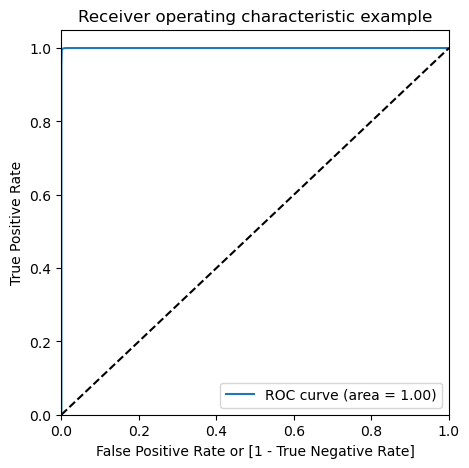

In [69]:
draw_roc(y_train_pred_final.Exited, y_train_pred_final.Exited_Prob)

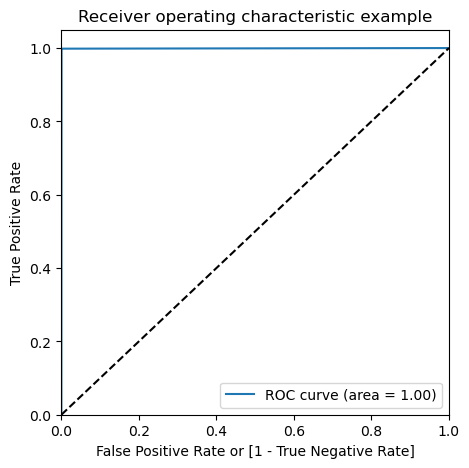

In [70]:
draw_roc(y_test_pred_final.Exited, y_test_pred_final.Exited_Prob)

In [71]:
#in model building we prefer test dataset prediction probabilities to decide optimum threshold
#on test dataset 
y_test_pred_final

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Exited_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()



,Cust_ID,Exited,Exited_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,2656,0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,445,0,0.0,0,0,0,0,0,0,0,0,0,0,0
2,9505,0,0.0,0,0,0,0,0,0,0,0,0,0,0
3,332,0,0.0,0,0,0,0,0,0,0,0,0,0,0
4,4168,0,0.0,0,0,0,0,0,0,0,0,0,0,0


     threshold  accuracy     sensi     speci
0.0        0.0  0.992667  0.998350  0.991228
0.1        0.1  0.999333  0.998350  0.999582
0.2        0.2  0.999333  0.998350  0.999582
0.3        0.3  0.999333  0.998350  0.999582
0.4        0.4  0.999333  0.998350  0.999582
0.5        0.5  0.999333  0.998350  0.999582
0.6        0.6  0.999333  0.998350  0.999582
0.7        0.7  0.998000  0.991749  0.999582
0.8        0.8  0.998000  0.991749  0.999582
0.9        0.9  0.998000  0.991749  0.999582


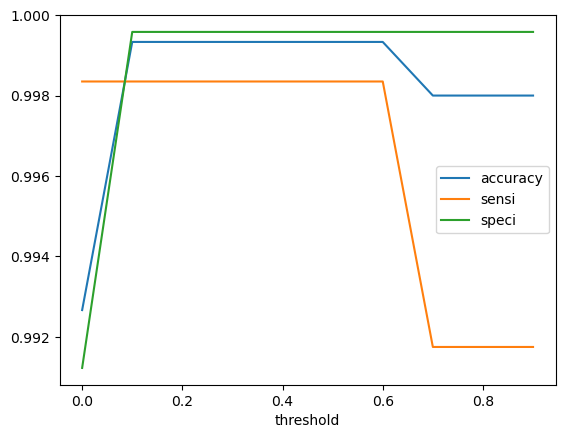

In [72]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Exited, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensi','speci'])
plt.show()

In [73]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Exited_Prob.map( lambda x: 1 if x > 0.14else 0)


y_train_pred_final.head()

,Cust_ID,Exited,Exited_Prob,predicted,final_predicted
0,3144,0,0.0,0,0
1,9939,0,0.0,0,0
2,7925,0,0.0,0,0
3,309,0,0.0,0,0
4,9415,0,0.0,0,0


In [74]:
result_df_train_013=generate_model_result_proba(y_train,y_train_pred_final['final_predicted'])

In [75]:
result_df_train_013

{'accuracy': 0.998,
 'recall': 0.998,
 'precision': 0.994,
 'FPR': 0.002,
 'specificity': 0.998}

In [76]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Exited_Prob.map( lambda x: 1 if x > 0.14 else 0)

y_test_pred_final.head()

,Cust_ID,Exited,Exited_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,2656,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,445,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,9505,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,332,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,4168,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
result_df_test_013=generate_model_result_proba(y_test,y_test_pred_final['final_predicted'])

In [78]:
result_df_test_013

{'accuracy': 0.999,
 'recall': 0.998,
 'precision': 0.998,
 'FPR': 0.0,
 'specificity': 1.0}

# Example: